## Data Preprocessing

### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rc
import seaborn as sns

### Import Data


In [ ]:
train_set = pd.read_csv('Train.csv')
unseen_set = pd.read_csv('Test.csv')
riders_set = pd.read_csv('Riders.csv')

In [ ]:
train_set.columns

In [ ]:
plt.scatter(x=train_set['Time from Pickup to Arrival'],y=train_set['Distance (KM)'],color='blue',edgecolor='k')
plt.xlabel('Time Taken')
plt.ylabel('Distance')

plt.title('Temperature vs Precipition \n')

plt.show()

In [ ]:
train_set.describe()

In [ ]:
# Store columns present in Train.csv but not in Test.csv
# To be used later as dependent variable vectors

dep_var = []

for i in train_set.columns.tolist():
    if i in unseen_set.columns.tolist():
        pass
    else:
        dep_var.append(i)
        
dep_var

In [ ]:
train_set.head()

In [ ]:
train_set.columns = [col.replace(" ","_") for col in train_set.columns] 
train_set.head()

In [ ]:
# Order No is the main identifier variable for each row
# Set Order No column as index

train_set = train_set.set_index('Order_No')
train_set.head()

## Taking care of missing data

In [ ]:
# Replace NaNs in Temperature and Precipitation with column specific mean

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(train_set.iloc[:, 20:22])
train_set.iloc[:, 20:22] = imputer.transform(train_set.iloc[:, 20:22])

train_set.head()

## Dealing with categorical data

In [ ]:
# Dummy encode catergorical values in 'Vehicle Type' and 'Personal or Business' columns

train_set = pd.get_dummies(train_set, columns = ['Personal_or_Business', 'Vehicle_Type'], drop_first=True)
train_set.head()

In [ ]:
# Convert string of time into 24 hour datetime and extract hour variable

train_set['Placement_-_Time'] = pd.to_datetime(train_set['Placement_-_Time']).dt.strftime('%H')#:%M:%S')
train_set['Confirmation_-_Time'] = pd.to_datetime(train_set['Confirmation_-_Time']).dt.strftime('%H')#:%M:%S')
train_set['Arrival_at_Pickup_-_Time'] = pd.to_datetime(train_set['Arrival_at_Pickup_-_Time']).dt.strftime('%H')#:%M:%S')
train_set['Pickup_-_Time'] = pd.to_datetime(train_set['Pickup_-_Time']).dt.strftime('%H')#:%M:%S')
train_set['Arrival_at_Destination_-_Time'] = pd.to_datetime(train_set['Arrival_at_Destination_-_Time']).dt.strftime('%H')#:%M:%S')

train_set.head()

In [ ]:
# Extract only int value from 'User Id' string

train_set['User_Id'] = [train_set['User_Id'][i][8:] for i in range(len(train_set))]

In [ ]:
# Extract only int value from 'Rider Id' string

train_set['Rider_Id'] = [train_set['Rider_Id'][i][9:] for i in range(len(train_set))]

Doesn't make sense to only take int value, as the original value within the column is simply a label not a magnitude against which the dependent variable can be measured

In [ ]:
train_set.head()

In [ ]:
# Reordering dataframe for seperation into independent and dependent variables

dep_var = [col.replace(" ","_") for col in dep_var]
train_set = train_set[[c for c in train_set if c not in dep_var] 
       + dep_var]
train_set.head()

In [ ]:
# Storing data as variables

X = train_set.iloc[:, :-4].values
y = train_set.iloc[:, -4:].values

## Splitting the dataset into the Training set and Validation set

In [ ]:
# Creating a validation set from the data

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 1)

## Training the Multiple Linear Regression model on the Training set

In [ ]:
# Training model on training set

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.fit(X_train, y_train)

## Predicting the Test set results

In [ ]:
# Storing predicted dependent variable results from set of validation features

y_pred = regressor.predict(X_val)

In [ ]:
y_pred

In [ ]:
y_val

### Evaluating Regression Model

In [ ]:
# Displaying Root Mean Squared Error comparing actual values to the predicted values

from sklearn import metrics
from math import sqrt

print('RMSE:', sqrt(metrics.mean_squared_error(y_val[:,3], y_pred[:,3])))

In [ ]:
X_names = train_set.iloc[:, :-4].columns
y_names = train_set.iloc[:, -4:].columns

formula_str = y_names +" ~ "+" + ".join(X_names);
#print('Formula:\n\t {}'.format(formula_str))

for b in y_names.tolist():
    print (b)

Having fit our model to the provided training data, we can now inspect its coefficients to get a better understanding of their influence on the predictions the model will provide:


In [ ]:
#Intercept for last column ('Time from Pickup to Arrival')
beta_0 = float(regressor.intercept_[-1])
beta_0



In [ ]:
#Coeffecients for last column ('Time from Pickup to Arrival')

pd.DataFrame(regressor.coef_[-1,:],train_set.iloc[:, :-4].columns, columns=['Coeffecient'])

## Predicting the unseen data results

In [ ]:
# Storing unchanged unseen data in new variable

unseen_set = pd.read_csv('Test.csv')
unseen_set.columns = [col.replace(" ","_") for col in unseen_set.columns] 
unseen_set.head()

In [ ]:
# Performing identical transformations on relevant columns in unseen data to have comparable data as features

unseen_set = unseen_set.set_index('Order_No')

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(unseen_set.iloc[:,17:19])
unseen_set.iloc[:, 17:19] = imputer.transform(unseen_set.iloc[:, 17:19])

unseen_set = pd.get_dummies(unseen_set, columns = ['Personal_or_Business', 'Vehicle_Type'], drop_first=True)

unseen_set['Placement_-_Time'] = pd.to_datetime(unseen_set['Placement_-_Time']).dt.strftime('%H')#:%M:%S')
unseen_set['Confirmation_-_Time'] = pd.to_datetime(unseen_set['Confirmation_-_Time']).dt.strftime('%H')#:%M:%S')
unseen_set['Arrival_at_Pickup_-_Time'] = pd.to_datetime(unseen_set['Arrival_at_Pickup_-_Time']).dt.strftime('%H')#:%M:%S')
unseen_set['Pickup_-_Time'] = pd.to_datetime(unseen_set['Pickup_-_Time']).dt.strftime('%H')#:%M:%S')

unseen_set['User_Id'] = [unseen_set['User_Id'][i][8:] for i in range(len(unseen_set))]

unseen_set['Rider_Id'] = [unseen_set['Rider_Id'][i][9:] for i in range(len(unseen_set))]

unseen_set.head()

In [ ]:
# Storing all columns as features

X_test = unseen_set.values

In [ ]:
# Storing predicted dependant variables from predictions made from modelling the unseen data

sub_pred = regressor.predict(X_test)

In [ ]:
sub_pred

In [ ]:
# Displaying predicted variables as part of dataframe

unseen_set['Arrival_at_Destination_-_Day_of_Month'] = sub_pred[:,0]
unseen_set['Arrival_at_Destination_-_Weekday_(Mo = 1)'] = sub_pred[:,1]
unseen_set['Arrival_at_Destination_-_Time'] = sub_pred[:,2]
unseen_set['Time_from_Pickup_to_Arrival'] = sub_pred[:,3]
            
unseen_set.head()

## Exporting data for submission

In [ ]:
# Storing last column into new variable and displaying

submission = unseen_set['Time_from_Pickup_to_Arrival']
submission

In [ ]:
# Saving new dataframe as csv

submission.to_csv('submission1.csv')

# Building a more accurate model!

Explanation of why I find it necessary make to changes to what features were used, what imputations were made etc

# Importing Data

In [27]:
train_set = pd.read_csv('Train.csv')
unseen_set = pd.read_csv('Test.csv')
riders_set = pd.read_csv('Riders.csv')

In [28]:
# Store columns present in Train.csv but not in Test.csv
# To be used later as dependent variable vectors

dep_var = []

for i in train_set.columns.tolist():
    if i in unseen_set.columns.tolist():
        pass
    else:
        dep_var.append(i)
        
dep_var

['Arrival at Destination - Day of Month',
 'Arrival at Destination - Weekday (Mo = 1)',
 'Arrival at Destination - Time',
 'Time from Pickup to Arrival']

In [29]:
train_set.columns = [col.replace(" ","_") for col in train_set.columns] 
train_set.head()

,Order_No,User_Id,Vehicle_Type,Platform_Type,Personal_or_Business,Placement_-_Day_of_Month,Placement_-_Weekday_(Mo_=_1),Placement_-_Time,Confirmation_-_Day_of_Month,Confirmation_-_Weekday_(Mo_=_1),...,Arrival_at_Destination_-_Time,Distance_(KM),Temperature,Precipitation_in_millimeters,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,Rider_Id,Time_from_Pickup_to_Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


In [5]:
train_set.describe()

,Platform_Type,Placement_-_Day_of_Month,Placement_-_Weekday_(Mo_=_1),Confirmation_-_Day_of_Month,Confirmation_-_Weekday_(Mo_=_1),Arrival_at_Pickup_-_Day_of_Month,Arrival_at_Pickup_-_Weekday_(Mo_=_1),Pickup_-_Day_of_Month,Pickup_-_Weekday_(Mo_=_1),Arrival_at_Destination_-_Day_of_Month,Arrival_at_Destination_-_Weekday_(Mo_=_1),Distance_(KM),Temperature,Precipitation_in_millimeters,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,Time_from_Pickup_to_Arrival
count,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,16835.000000,552.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000
mean,2.752182,15.653696,3.240083,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,9.506533,23.258889,7.905797,-1.281470,36.811264,-1.282581,36.811220,1556.920947
std,0.625178,8.798916,1.567295,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,5.668963,3.615768,17.089971,0.030507,0.037473,0.034824,0.044721,987.270788
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.200000,0.100000,-1.438302,36.653621,-1.430298,36.606594,1.000000
25%,3.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,5.000000,20.600000,1.075000,-1.300921,36.784605,-1.301201,36.785661,882.000000
50%,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,8.000000,23.500000,2.900000,-1.279395,36.807040,-1.284382,36.808002,1369.000000
75%,3.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,13.000000,26.000000,4.900000,-1.257147,36.829741,-1.261177,36.829477,2040.000000
max,4.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,49.000000,32.100000,99.100000,-1.147170,36.991046,-1.030225,37.016779,7883.000000


# Cleaning Data

## Taking care of missing data

minimum precipitation measured is 0.1mm


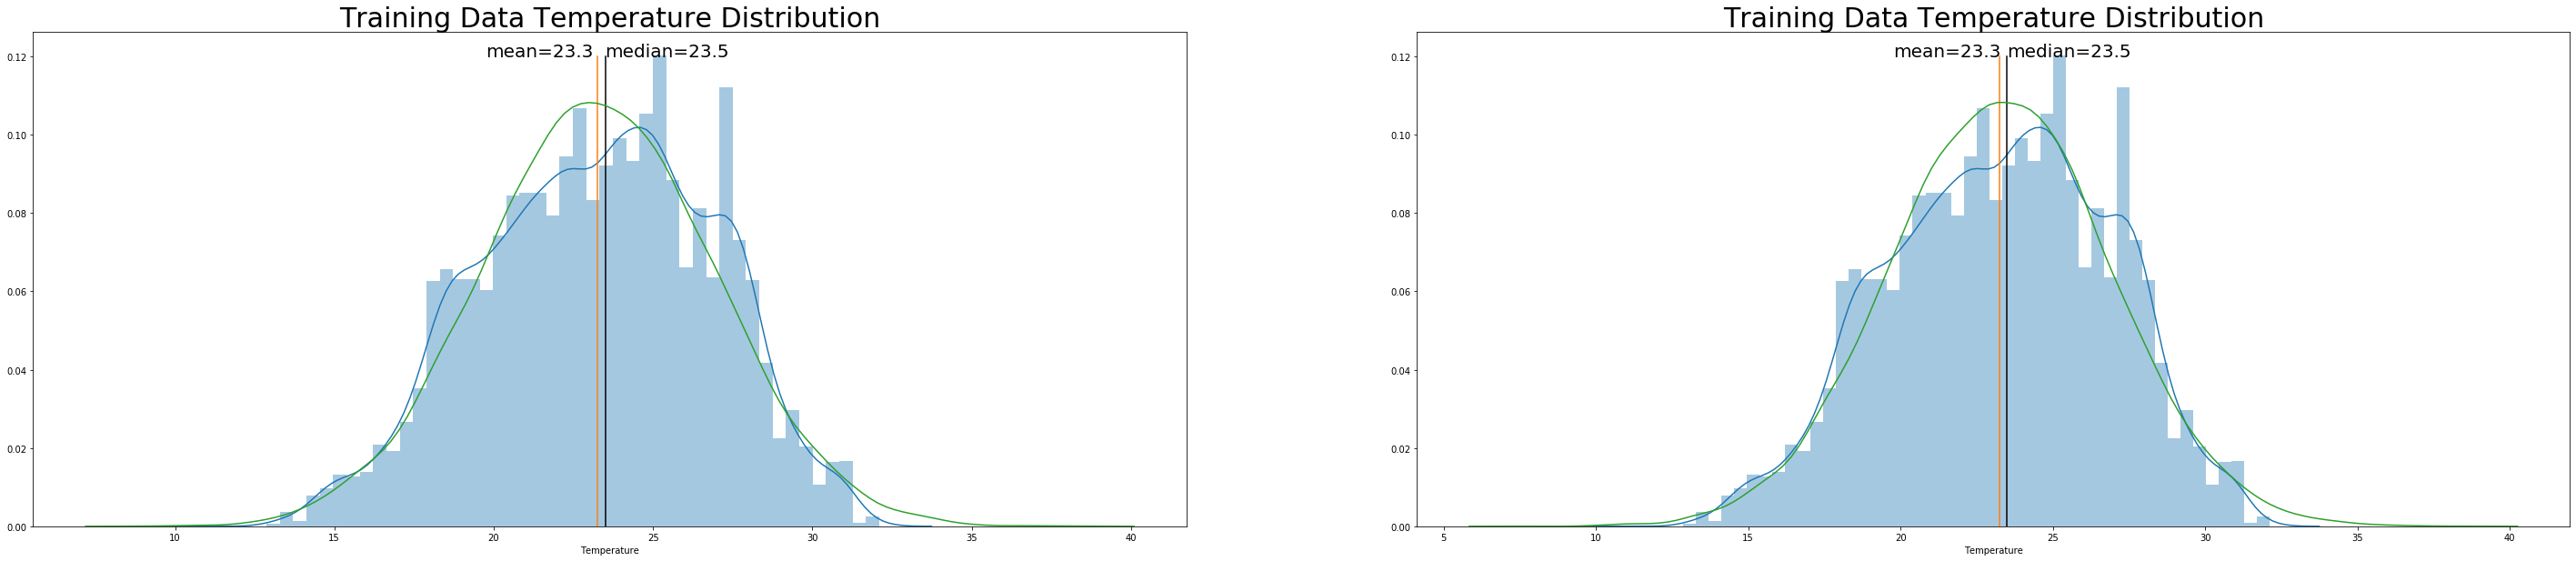

In [6]:
from matplotlib import rcParams

# @title Check Precipitation and temperature columns
rain = train_set["Precipitation_in_millimeters"]
print(f"minimum precipitation measured is {rain.min()}mm")

rcParams['figure.figsize'] = 50, 10

f, axes = plt.subplots(1, 2)

temps = train_set['Temperature']
sns.distplot(temps, ax=axes[0])
axes[0].plot([temps.mean(), temps.mean()],[0,0.12])
axes[0].plot([temps.median(), temps.median()],[0,0.12], color='k')
axes[0].text(x=temps.median(),y=.12, s=f'median={temps.median()}', fontsize=20)
axes[0].text(temps.mean()-3.5,.12, f'mean={round(temps.mean(),1)}', fontsize=20)
sns.kdeplot(np.random.normal(temps.mean(), temps.std(), temps.shape), ax=axes[0])
axes[0].set_title('Training Data Temperature Distribution', fontsize=30)

temps = train_set['Temperature']
sns.distplot(temps, ax=axes[1])
axes[1].plot([temps.mean(), temps.mean()],[0,0.12])
axes[1].plot([temps.median(), temps.median()],[0,0.12], color='k')
axes[1].text(temps.median(),.12, f'median={temps.median()}', fontsize=20)
axes[1].text(temps.mean()-3.5,.12, f'mean={round(temps.mean(),1)}', fontsize=20)
sns.kdeplot(np.random.normal(temps.mean(), temps.std(), temps.shape), ax=axes[1])
axes[1].set_title('Training Data Temperature Distribution', fontsize=30)
plt.show()

In [ ]:
train_set.isnull().sum()

In [ ]:
fig, axs = plt.subplots(2,1, figsize=(30,15),)
fig.subplots_adjust(hspace = 0.5, wspace=.2)
axs = axs.ravel()

for index, column in enumerate(train_set.iloc[:,-8:-6].columns):
    axs[index-1].set_title("{} vs. Time_from_Pickup_to_Arrival".format(column),fontsize=16)
    axs[index-1].scatter(x=train_set.iloc[:,-8:-6][column],y=train_set['Time_from_Pickup_to_Arrival'],color='blue',edgecolor='k')
    
fig.tight_layout(pad=1)

In [ ]:
train_set.iloc[:,-8:-6].describe()

In [ ]:
plt.scatter(x=train_set['Temperature'],y=train_set['Precipitation_in_millimeters'],color='blue',edgecolor='k')
plt.xlabel('Temperature')
plt.ylabel('Precipitation_in_millimeters')

plt.title('Temperature vs Precipition \n')

plt.show()

### Are nulls in precipitation column empty because data wasnt recorded, or because it didnt rain?

In [ ]:
train_set.isnull().sum()

In [30]:
# Replace NaNs in Temperature with column specific mean


from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer2 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)

imputer.fit(train_set.iloc[:,-8:-7])
train_set.iloc[:,-8:-7] = imputer.transform(train_set.iloc[:,-8:-7])

imputer2.fit(train_set.iloc[:,-7:-6])
train_set.iloc[:,-7:-6] = imputer2.transform(train_set.iloc[:,-7:-6])

train_set.head()


,Order_No,User_Id,Vehicle_Type,Platform_Type,Personal_or_Business,Placement_-_Day_of_Month,Placement_-_Weekday_(Mo_=_1),Placement_-_Time,Confirmation_-_Day_of_Month,Confirmation_-_Weekday_(Mo_=_1),...,Arrival_at_Destination_-_Time,Distance_(KM),Temperature,Precipitation_in_millimeters,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,Rider_Id,Time_from_Pickup_to_Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.400000,0.0,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.400000,0.0,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,23.258889,0.0,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.200000,0.0,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.400000,0.0,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


# Explain why I chose replace with zero over mean, GRAPHICALLY. CORR MAP?

Stated that's it measured every 3 hours. If null- no measurement-

Consider grouping temperature imputation by time

## Dealing with categorical columns

In [ ]:
train_set.info()

### Encoding Categorical Columns

In [ ]:
vehicle_count = train_set['Vehicle_Type'].value_counts()
sns.set(style="darkgrid")
sns.barplot(vehicle_count.index, vehicle_count.values, alpha=0.9)
plt.title('Frequency Distribution of Vehicle')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Vehicle', fontsize=12)
plt.show()

Stated in information on Zindy that only vehicle type used is a bike

In [ ]:
custtype_count = train_set['Personal_or_Business'].value_counts()
sns.set(style="darkgrid")
sns.barplot(custtype_count.index, custtype_count.values, alpha=0.9)
plt.title('Frequency Distribution of Customer Type')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Customer Type', fontsize=12)
plt.show()

In [ ]:
platform_count = train_set['Platform_Type'].value_counts()
sns.set(style="darkgrid")
sns.barplot(platform_count.index, platform_count.values, alpha=0.9)
plt.title('Frequency Distribution of Platform')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Platform', fontsize=12)
plt.show()

Does using platform labelled 3 have 3 times more weight than using platform labelled 1? No. Therefore should be one hot encoded

Not necessary t dummy encode personal or business. use label encoder or do it manually

In [31]:
# Dummy encode catergorical values in 'Vehicle Type' and 'Personal or Business' columns

train_set = pd.get_dummies(train_set, columns = ['Personal_or_Business', 'Vehicle_Type', 'Platform_Type'], drop_first=True)
train_set.head()

,Order_No,User_Id,Placement_-_Day_of_Month,Placement_-_Weekday_(Mo_=_1),Placement_-_Time,Confirmation_-_Day_of_Month,Confirmation_-_Weekday_(Mo_=_1),Confirmation_-_Time,Arrival_at_Pickup_-_Day_of_Month,Arrival_at_Pickup_-_Weekday_(Mo_=_1),...,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,Rider_Id,Time_from_Pickup_to_Arrival,Personal_or_Business_Personal,Platform_Type_2,Platform_Type_3,Platform_Type_4
0,Order_No_4211,User_Id_633,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,...,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,0,0,1,0
1,Order_No_25375,User_Id_2285,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,...,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993,1,0,1,0
2,Order_No_1899,User_Id_265,30,2,12:39:25 PM,30,2,12:42:44 PM,30,2,...,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455,0,0,1,0
3,Order_No_9336,User_Id_1402,15,5,9:25:34 AM,15,5,9:26:05 AM,15,5,...,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341,0,0,1,0
4,Order_No_27883,User_Id_1737,13,1,9:55:18 AM,13,1,9:56:18 AM,13,1,...,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214,1,0,0,0


### Categorical with High Cardinality

Need to deal with categorical columns with high cardinality ('Order_No, 'User_Id','Rider_Id')


Can't One-hot encode. Number of parameters will exceed number of observations... Lead to unidentifiable model

In [32]:
# Order No is the main identifier variable for each row
# Set Order No column as index


train_set = train_set.set_index('Order_No')
train_set[['User_Id','Rider_Id']].head()

,User_Id,Rider_Id
Order_No,,
Order_No_4211,User_Id_633,Rider_Id_432
Order_No_25375,User_Id_2285,Rider_Id_856
Order_No_1899,User_Id_265,Rider_Id_155
Order_No_9336,User_Id_1402,Rider_Id_855
Order_No_27883,User_Id_1737,Rider_Id_770


In [ ]:
train_set[['User_Id','Rider_Id']].nunique()

Can I replace User_Id with the number of times it appears (orders it made)? Or rather as a fraction of total orders made in the period?


In [33]:
user_id = (train_set.groupby('User_Id').count().iloc[:,0])
user_id.describe()

count    3186.000000
mean        6.654426
std        24.982798
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max       645.000000
Name: Placement_-_Day_of_Month, dtype: float64

In [ ]:
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(user_id)

In [34]:
train_set['Proportion_of_total_order'] = [float(user_id[train_set['User_Id'][i]])**(-1) for i in range(len(train_set))]
train_set = train_set.drop(['User_Id'], axis='columns')
train_set.head()

,Placement_-_Day_of_Month,Placement_-_Weekday_(Mo_=_1),Placement_-_Time,Confirmation_-_Day_of_Month,Confirmation_-_Weekday_(Mo_=_1),Confirmation_-_Time,Arrival_at_Pickup_-_Day_of_Month,Arrival_at_Pickup_-_Weekday_(Mo_=_1),Arrival_at_Pickup_-_Time,Pickup_-_Day_of_Month,...,Pickup_Long,Destination_Lat,Destination_Long,Rider_Id,Time_from_Pickup_to_Arrival,Personal_or_Business_Personal,Platform_Type_2,Platform_Type_3,Platform_Type_4,Proportion_of_total_order
Order_No,,,,,,,,,,,,,,,,,,,,,
Order_No_4211,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,9,...,36.830370,-1.300406,36.829741,Rider_Id_432,745,0,0,1,0,0.005495
Order_No_25375,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,11:40:22 AM,12,...,36.899315,-1.295004,36.814358,Rider_Id_856,1993,1,0,1,0,0.125000
Order_No_1899,30,2,12:39:25 PM,30,2,12:42:44 PM,30,2,12:49:34 PM,30,...,36.843419,-1.300921,36.828195,Rider_Id_155,455,0,0,1,0,0.006173
Order_No_9336,15,5,9:25:34 AM,15,5,9:26:05 AM,15,5,9:37:56 AM,15,...,36.832396,-1.257147,36.795063,Rider_Id_855,1341,0,0,1,0,0.013514
Order_No_27883,13,1,9:55:18 AM,13,1,9:56:18 AM,13,1,10:03:53 AM,13,...,36.792118,-1.295041,36.809817,Rider_Id_770,1214,1,0,0,0,1.000000


Can I replace Rider_Id with Rider Rating?

In [35]:
train_set['Rider_Average_Rating'] = [riders_set[riders_set['Rider Id'] == train_set['Rider_Id'][i]]['Average_Rating'].iloc[0] for i in range(len(train_set))]
train_set = train_set.drop(['Rider_Id'], axis=1)
train_set.head()

,Placement_-_Day_of_Month,Placement_-_Weekday_(Mo_=_1),Placement_-_Time,Confirmation_-_Day_of_Month,Confirmation_-_Weekday_(Mo_=_1),Confirmation_-_Time,Arrival_at_Pickup_-_Day_of_Month,Arrival_at_Pickup_-_Weekday_(Mo_=_1),Arrival_at_Pickup_-_Time,Pickup_-_Day_of_Month,...,Pickup_Long,Destination_Lat,Destination_Long,Time_from_Pickup_to_Arrival,Personal_or_Business_Personal,Platform_Type_2,Platform_Type_3,Platform_Type_4,Proportion_of_total_order,Rider_Average_Rating
Order_No,,,,,,,,,,,,,,,,,,,,,
Order_No_4211,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,9,...,36.830370,-1.300406,36.829741,745,0,0,1,0,0.005495,13.8
Order_No_25375,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,11:40:22 AM,12,...,36.899315,-1.295004,36.814358,1993,1,0,1,0,0.125000,13.6
Order_No_1899,30,2,12:39:25 PM,30,2,12:42:44 PM,30,2,12:49:34 PM,30,...,36.843419,-1.300921,36.828195,455,0,0,1,0,0.006173,12.5
Order_No_9336,15,5,9:25:34 AM,15,5,9:26:05 AM,15,5,9:37:56 AM,15,...,36.832396,-1.257147,36.795063,1341,0,0,1,0,0.013514,14.5
Order_No_27883,13,1,9:55:18 AM,13,1,9:56:18 AM,13,1,10:03:53 AM,13,...,36.792118,-1.295041,36.809817,1214,1,0,0,0,1.000000,14.1


## Dealing with duplicated data

Distance (KM) column exists, do we need Pickup Lat, Long and Delivery Lat, Long? Is the latter's information not already present in the former's?

In [36]:
train_set = train_set.drop(['Pickup_Lat', 'Pickup_Long','Destination_Lat', 'Destination_Long'], axis=1)
train_set.head()

,Placement_-_Day_of_Month,Placement_-_Weekday_(Mo_=_1),Placement_-_Time,Confirmation_-_Day_of_Month,Confirmation_-_Weekday_(Mo_=_1),Confirmation_-_Time,Arrival_at_Pickup_-_Day_of_Month,Arrival_at_Pickup_-_Weekday_(Mo_=_1),Arrival_at_Pickup_-_Time,Pickup_-_Day_of_Month,...,Distance_(KM),Temperature,Precipitation_in_millimeters,Time_from_Pickup_to_Arrival,Personal_or_Business_Personal,Platform_Type_2,Platform_Type_3,Platform_Type_4,Proportion_of_total_order,Rider_Average_Rating
Order_No,,,,,,,,,,,,,,,,,,,,,
Order_No_4211,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,9,...,4,20.400000,0.0,745,0,0,1,0,0.005495,13.8
Order_No_25375,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,11:40:22 AM,12,...,16,26.400000,0.0,1993,1,0,1,0,0.125000,13.6
Order_No_1899,30,2,12:39:25 PM,30,2,12:42:44 PM,30,2,12:49:34 PM,30,...,3,23.258889,0.0,455,0,0,1,0,0.006173,12.5
Order_No_9336,15,5,9:25:34 AM,15,5,9:26:05 AM,15,5,9:37:56 AM,15,...,9,19.200000,0.0,1341,0,0,1,0,0.013514,14.5
Order_No_27883,13,1,9:55:18 AM,13,1,9:56:18 AM,13,1,10:03:53 AM,13,...,9,15.400000,0.0,1214,1,0,0,0,1.000000,14.1


In [ ]:
train_set.describe()

Columns appear to have identitical data

In [ ]:
def getDuplicateColumns(df):
    '''
    Get a list of duplicate columns.
    It will iterate over all the columns in dataframe and find the columns whose contents are duplicate.
    :param df: Dataframe object
    :return: List of columns whose contents are duplicates.
    '''
    duplicateColumnNames = set()
    # Iterate over all the columns in dataframe
    for x in range(df.shape[1]):
        # Select column at xth index.
        col = df.iloc[:, x]
        # Iterate over all the columns in DataFrame from (x+1)th index till end
        for y in range(x + 1, df.shape[1]):
            # Select column at yth index.
            otherCol = df.iloc[:, y]
            # Check if two columns at x 7 y index are equal
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])
 
    return list(duplicateColumnNames)

In [ ]:
getDuplicateColumns(train_set)

Consider removing duplicate columns which represent predictor variables

There is no difference in the day between the confirmation of the order, the arrival of the parcel at pickup, the day of pickup (X-values).

The parcels all arrive at destination on the same day. Are they therefore the same variable? And can I remove the appropriate columns from the dependent variables?


Dealing with datetime varialble columns? Use to create relative columns for 'Time from Placement to Confirmation', 'Time from Confirmation to Arrival at Pickup', 'Time from Arrival at Pickup to Pickup'?

Let's convert all time to 24 hour format

In [37]:
train_set['Placement_-_Time'] = pd.to_datetime(train_set['Placement_-_Time'])#.dt.time#strftime('%H:%M:%S')
train_set['Confirmation_-_Time'] = pd.to_datetime(train_set['Confirmation_-_Time'])#.dt.time#strftime('%H:%M:%S')
train_set['Arrival_at_Pickup_-_Time'] = pd.to_datetime(train_set['Arrival_at_Pickup_-_Time'])#.dt.time#strftime('%H:%M:%S')
train_set['Pickup_-_Time'] = pd.to_datetime(train_set['Pickup_-_Time'])#.dt.time#strftime('%H:%M:%S')
train_set['Arrival_at_Destination_-_Time'] = pd.to_datetime(train_set['Arrival_at_Destination_-_Time'])#.dt.time#strftime('%H:%M:%S')

train_set.head()

,Placement_-_Day_of_Month,Placement_-_Weekday_(Mo_=_1),Placement_-_Time,Confirmation_-_Day_of_Month,Confirmation_-_Weekday_(Mo_=_1),Confirmation_-_Time,Arrival_at_Pickup_-_Day_of_Month,Arrival_at_Pickup_-_Weekday_(Mo_=_1),Arrival_at_Pickup_-_Time,Pickup_-_Day_of_Month,...,Distance_(KM),Temperature,Precipitation_in_millimeters,Time_from_Pickup_to_Arrival,Personal_or_Business_Personal,Platform_Type_2,Platform_Type_3,Platform_Type_4,Proportion_of_total_order,Rider_Average_Rating
Order_No,,,,,,,,,,,,,,,,,,,,,
Order_No_4211,9,5,2020-05-29 09:35:46,9,5,2020-05-29 09:40:10,9,5,2020-05-29 10:04:47,9,...,4,20.400000,0.0,745,0,0,1,0,0.005495,13.8
Order_No_25375,12,5,2020-05-29 11:16:16,12,5,2020-05-29 11:23:21,12,5,2020-05-29 11:40:22,12,...,16,26.400000,0.0,1993,1,0,1,0,0.125000,13.6
Order_No_1899,30,2,2020-05-29 12:39:25,30,2,2020-05-29 12:42:44,30,2,2020-05-29 12:49:34,30,...,3,23.258889,0.0,455,0,0,1,0,0.006173,12.5
Order_No_9336,15,5,2020-05-29 09:25:34,15,5,2020-05-29 09:26:05,15,5,2020-05-29 09:37:56,15,...,9,19.200000,0.0,1341,0,0,1,0,0.013514,14.5
Order_No_27883,13,1,2020-05-29 09:55:18,13,1,2020-05-29 09:56:18,13,1,2020-05-29 10:03:53,13,...,9,15.400000,0.0,1214,1,0,0,0,1.000000,14.1


Perhaps use an arbitrary year and month (with 31 days) and create a yyyy:mm:dd hh:mm:ss datetime? With '...Day_of_Month' as the day and '...Time' as the 24 hour time. Then calculate difference to account for instances where day of placement != day of confirmation

Using following functions treat year and month as arbitrary, and assume of time based on how they're entered into equation

In [38]:
train_set['Placement_-_Time'] = [train_set['Placement_-_Time'][i].replace(month=5, day=train_set['Placement_-_Day_of_Month'][i]) for i in range(len(train_set))]
train_set['Confirmation_-_Time'] = [train_set['Confirmation_-_Time'][i].replace(month=5, day=train_set['Confirmation_-_Day_of_Month'][i]) for i in range(len(train_set))]
train_set['Arrival_at_Pickup_-_Time'] = [train_set['Arrival_at_Pickup_-_Time'][i].replace(month=5, day=train_set['Arrival_at_Pickup_-_Day_of_Month'][i]) for i in range(len(train_set))]
train_set['Pickup_-_Time'] = [train_set['Pickup_-_Time'][i].replace(month=5, day=train_set['Pickup_-_Day_of_Month'][i]) for i in range(len(train_set))]
train_set['Arrival_at_Destination_-_Time'] = [train_set['Arrival_at_Destination_-_Time'][i].replace(month=5, day=train_set['Arrival_at_Destination_-_Day_of_Month'][i]) for i in range(len(train_set))]

# Added data from '...Day_of_Month' columns to '...Time' columns (also affected by day on which order placed, confirmed etc), so can be removed
train_set = train_set.drop(['Placement_-_Day_of_Month','Confirmation_-_Day_of_Month','Arrival_at_Pickup_-_Day_of_Month','Pickup_-_Day_of_Month'], axis=1)
train_set = train_set.drop(['Placement_-_Weekday_(Mo_=_1)','Confirmation_-_Weekday_(Mo_=_1)','Arrival_at_Pickup_-_Weekday_(Mo_=_1)', 'Pickup_-_Weekday_(Mo_=_1)'], axis=1)

# Information in Arrival_at_Destination DAy_of_month and _weekday column traditionally used to calculate Time_from_Pickup_to_Arrival(dependent variable vector) in train data
train_set = train_set.drop(['Arrival_at_Destination_-_Day_of_Month'], axis=1)
train_set = train_set.drop(['Arrival_at_Destination_-_Weekday_(Mo_=_1)'], axis=1)


train_set.head()

,Placement_-_Time,Confirmation_-_Time,Arrival_at_Pickup_-_Time,Pickup_-_Time,Arrival_at_Destination_-_Time,Distance_(KM),Temperature,Precipitation_in_millimeters,Time_from_Pickup_to_Arrival,Personal_or_Business_Personal,Platform_Type_2,Platform_Type_3,Platform_Type_4,Proportion_of_total_order,Rider_Average_Rating
Order_No,,,,,,,,,,,,,,,
Order_No_4211,2020-05-09 09:35:46,2020-05-09 09:40:10,2020-05-09 10:04:47,2020-05-09 10:27:30,2020-05-09 10:39:55,4,20.400000,0.0,745,0,0,1,0,0.005495,13.8
Order_No_25375,2020-05-12 11:16:16,2020-05-12 11:23:21,2020-05-12 11:40:22,2020-05-12 11:44:09,2020-05-12 12:17:22,16,26.400000,0.0,1993,1,0,1,0,0.125000,13.6
Order_No_1899,2020-05-30 12:39:25,2020-05-30 12:42:44,2020-05-30 12:49:34,2020-05-30 12:53:03,2020-05-30 13:00:38,3,23.258889,0.0,455,0,0,1,0,0.006173,12.5
Order_No_9336,2020-05-15 09:25:34,2020-05-15 09:26:05,2020-05-15 09:37:56,2020-05-15 09:43:06,2020-05-15 10:05:27,9,19.200000,0.0,1341,0,0,1,0,0.013514,14.5
Order_No_27883,2020-05-13 09:55:18,2020-05-13 09:56:18,2020-05-13 10:03:53,2020-05-13 10:05:23,2020-05-13 10:25:37,9,15.400000,0.0,1214,1,0,0,0,1.000000,14.1


Information from Day_of_month columns now in Time columns. Let's create relevant columns to show the passage of time

In [39]:
train_set['Time_from_Placement_to_Confirmation'] = [(train_set['Confirmation_-_Time'][i] - train_set['Placement_-_Time'][i]).total_seconds() for i in range(len(train_set))]
train_set['Time_from_Confirmation_to_Arrival_at_Pickup'] = [(train_set['Arrival_at_Pickup_-_Time'][i] - train_set['Confirmation_-_Time'][i]).total_seconds() for i in range(len(train_set))]
train_set['Time_from_Arrival_at_Pickup_to_Pickup'] = [(train_set['Pickup_-_Time'][i] - train_set['Arrival_at_Pickup_-_Time'][i]).total_seconds() for i in range(len(train_set))]

# Information from '...Time' columns now represented in '...from...to...' columns, so can be dropped
train_set = train_set.drop(['Confirmation_-_Time','Placement_-_Time','Arrival_at_Pickup_-_Time','Pickup_-_Time','Arrival_at_Pickup_-_Time'], axis=1)

# Information in Arrival_at_Destination_-_Time column traditionally used to calculate Time_from_Pickup_to_Arrival(dependent variable vector) in train data
train_set = train_set.drop(['Arrival_at_Destination_-_Time'], axis=1)
train_set.head()

,Distance_(KM),Temperature,Precipitation_in_millimeters,Time_from_Pickup_to_Arrival,Personal_or_Business_Personal,Platform_Type_2,Platform_Type_3,Platform_Type_4,Proportion_of_total_order,Rider_Average_Rating,Time_from_Placement_to_Confirmation,Time_from_Confirmation_to_Arrival_at_Pickup,Time_from_Arrival_at_Pickup_to_Pickup
Order_No,,,,,,,,,,,,,
Order_No_4211,4,20.400000,0.0,745,0,0,1,0,0.005495,13.8,264.0,1477.0,1363.0
Order_No_25375,16,26.400000,0.0,1993,1,0,1,0,0.125000,13.6,425.0,1021.0,227.0
Order_No_1899,3,23.258889,0.0,455,0,0,1,0,0.006173,12.5,199.0,410.0,209.0
Order_No_9336,9,19.200000,0.0,1341,0,0,1,0,0.013514,14.5,31.0,711.0,310.0
Order_No_27883,9,15.400000,0.0,1214,1,0,0,0,1.000000,14.1,60.0,455.0,90.0


In [ ]:
from statsmodels.graphics.correlation import plot_corr

fig = plt.figure(figsize=(15,15));
ax = fig.add_subplot(111);
plot_corr(train_set.corr(), xnames = train_set.corr().columns, ax = ax);

Consider drop borp-p or plat 3 for possibnle collinearty... Consider dropping 1 to build bettre model

In [ ]:
train_set.describe()

In [ ]:
fig, axs = plt.subplots(3,1, figsize=(30,15),)
fig.subplots_adjust(hspace = 0.5, wspace=.2)
axs = axs.ravel()

for index, column in enumerate(train_set.iloc[:,-3:].columns):
    axs[index-1].set_title("{} vs. Time_from_Pickup_to_Arrival".format(column),fontsize=16)
    axs[index-1].scatter(x=train_set.iloc[:,-3:][column],y=train_set['Time_from_Pickup_to_Arrival'],color='blue',edgecolor='k')
    
fig.tight_layout(pad=1)

Try to explain outliers

## Transforming unseen dataset

In [40]:
# Storing unchanged unseen data in new variable

unseen_set = pd.read_csv('Test.csv')
unseen_set.columns = [col.replace(" ","_") for col in unseen_set.columns] 
unseen_set.head()

,Order_No,User_Id,Vehicle_Type,Platform_Type,Personal_or_Business,Placement_-_Day_of_Month,Placement_-_Weekday_(Mo_=_1),Placement_-_Time,Confirmation_-_Day_of_Month,Confirmation_-_Weekday_(Mo_=_1),...,Pickup_-_Weekday_(Mo_=_1),Pickup_-_Time,Distance_(KM),Temperature,Precipitation_in_millimeters,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,Rider_Id
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,...,3,5:06:47 PM,8,NaN,NaN,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35 PM,17,5,...,5,1:25:37 PM,5,NaN,NaN,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,11:08:14 AM,27,4,...,4,11:57:54 AM,5,22.8,NaN,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26
3,Order_No_15332,User_Id_2910,Bike,3,Business,17,1,1:51:35 PM,17,1,...,1,2:16:52 PM,5,24.5,NaN,-1.290503,36.809646,-1.303382,36.790658,Rider_Id_685
4,Order_No_21373,User_Id_1205,Bike,3,Business,11,2,11:30:28 AM,11,2,...,2,11:56:04 AM,6,24.4,NaN,-1.281081,36.814423,-1.266467,36.792161,Rider_Id_858


In [41]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer2 = SimpleImputer(missing_values=np.nan, strategy='median')

imputer.fit(unseen_set.iloc[:,-7:-6])
unseen_set.iloc[:,-7:-6] = imputer.transform(unseen_set.iloc[:,-7:-6])

imputer2.fit(unseen_set.iloc[:,-6:-5])
unseen_set.iloc[:,-6:-5] = imputer2.transform(unseen_set.iloc[:,-6:-5])


unseen_set = pd.get_dummies(unseen_set, columns = ['Personal_or_Business', 'Vehicle_Type', 'Platform_Type'], drop_first=True)


unseen_set = unseen_set.set_index('Order_No')

user_id = (unseen_set.groupby('User_Id').count().iloc[:,0])

unseen_set['Proportion_of_total_order'] = [float(user_id[unseen_set['User_Id'][i]])**(-1) for i in range(len(unseen_set))]
unseen_set = unseen_set.drop(['User_Id'], axis='columns')
unseen_set['Rider_Average_Rating'] = [riders_set[riders_set['Rider Id'] == unseen_set['Rider_Id'][i]]['Average_Rating'].iloc[0] for i in range(len(unseen_set))]
unseen_set = unseen_set.drop(['Rider_Id'], axis=1)


unseen_set = unseen_set.drop(['Pickup_Lat', 'Pickup_Long','Destination_Lat', 'Destination_Long'], axis=1)


unseen_set['Placement_-_Time'] = pd.to_datetime(unseen_set['Placement_-_Time'])#.dt.time#strftime('%H:%M:%S')
unseen_set['Confirmation_-_Time'] = pd.to_datetime(unseen_set['Confirmation_-_Time'])#.dt.time#strftime('%H:%M:%S')
unseen_set['Arrival_at_Pickup_-_Time'] = pd.to_datetime(unseen_set['Arrival_at_Pickup_-_Time'])#.dt.time#strftime('%H:%M:%S')
unseen_set['Pickup_-_Time'] = pd.to_datetime(unseen_set['Pickup_-_Time'])#.dt.time#strftime('%H:%M:%S')



unseen_set['Placement_-_Time'] = [unseen_set['Placement_-_Time'][i].replace(month=5, day=unseen_set['Placement_-_Day_of_Month'][i]) for i in range(len(unseen_set))]
unseen_set['Confirmation_-_Time'] = [unseen_set['Confirmation_-_Time'][i].replace(month=5, day=unseen_set['Confirmation_-_Day_of_Month'][i]) for i in range(len(unseen_set))]
unseen_set['Arrival_at_Pickup_-_Time'] = [unseen_set['Arrival_at_Pickup_-_Time'][i].replace(month=5, day=unseen_set['Arrival_at_Pickup_-_Day_of_Month'][i]) for i in range(len(unseen_set))]
unseen_set['Pickup_-_Time'] = [unseen_set['Pickup_-_Time'][i].replace(month=5, day=unseen_set['Pickup_-_Day_of_Month'][i]) for i in range(len(unseen_set))]

# Added data from '...Day_of_Month' columns to '...Time' columns (also affected by day on which order placed, confirmed etc), so can be removed
unseen_set = unseen_set.drop(['Placement_-_Day_of_Month','Confirmation_-_Day_of_Month','Arrival_at_Pickup_-_Day_of_Month','Pickup_-_Day_of_Month'], axis=1)
unseen_set = unseen_set.drop(['Placement_-_Weekday_(Mo_=_1)','Confirmation_-_Weekday_(Mo_=_1)','Arrival_at_Pickup_-_Weekday_(Mo_=_1)', 'Pickup_-_Weekday_(Mo_=_1)'], axis=1)

# Information in Arrival_at_Destination DAy_of_month and _weekday column traditionally used to calculate Time_from_Pickup_to_Arrival(dependent variable vector) in train data
#unseen_set = unseen_set.drop(['Arrival_at_Destination_-_Day_of_Month'], axis=1)
#unseen_set = unseen_set.drop(['Arrival_at_Destination_-_Weekday_(Mo_=_1)'], axis=1)

unseen_set['Time_from_Placement_to_Confirmation'] = [(unseen_set['Confirmation_-_Time'][i] - unseen_set['Placement_-_Time'][i]).total_seconds() for i in range(len(unseen_set))]
unseen_set['Time_from_Confirmation_to_Arrival_at_Pickup'] = [(unseen_set['Arrival_at_Pickup_-_Time'][i] - unseen_set['Confirmation_-_Time'][i]).total_seconds() for i in range(len(unseen_set))]
unseen_set['Time_from_Arrival_at_Pickup_to_Pickup'] = [(unseen_set['Pickup_-_Time'][i] - unseen_set['Arrival_at_Pickup_-_Time'][i]).total_seconds() for i in range(len(unseen_set))]

# Information from '...Time' columns now represented in '...from...to...' columns, so can be dropped
unseen_set = unseen_set.drop(['Confirmation_-_Time','Placement_-_Time','Arrival_at_Pickup_-_Time','Pickup_-_Time','Arrival_at_Pickup_-_Time'], axis=1)

# Information in Arrival_at_Destination_-_Time column traditionally used to calculate Time_from_Pickup_to_Arrival(dependent variable vector) in train data
#unseen_set = unseen_set.drop(['Arrival_at_Destination_-_Time'], axis=1)

unseen_set.head()

,Distance_(KM),Temperature,Precipitation_in_millimeters,Personal_or_Business_Personal,Platform_Type_2,Platform_Type_3,Platform_Type_4,Proportion_of_total_order,Rider_Average_Rating,Time_from_Placement_to_Confirmation,Time_from_Confirmation_to_Arrival_at_Pickup,Time_from_Arrival_at_Pickup_to_Pickup
Order_No,,,,,,,,,,,,
Order_No_19248,8,23.24612,2.9,0,0,1,0,0.022727,13.3,19.0,515.0,823.0
Order_No_12736,5,23.24612,2.9,0,0,1,0,0.009804,14.4,102.0,1270.0,310.0
Order_No_768,5,22.80000,2.9,0,0,1,0,0.038462,13.1,1011.0,495.0,1474.0
Order_No_15332,5,24.50000,2.9,0,0,1,0,0.500000,13.7,112.0,554.0,851.0
Order_No_21373,6,24.40000,2.9,0,0,1,0,0.041667,14.1,257.0,754.0,525.0


In [68]:
# Storing all columns as features

X_test = unseen_set.values

### Storing dataset as variables

In [42]:
# Reordering dataframe for seperation into independent and dependent variables

dep_var = ['Time_from_Pickup_to_Arrival']
train_set = train_set[[c for c in train_set if c not in dep_var] 
       + dep_var]
train_set.head()

,Distance_(KM),Temperature,Precipitation_in_millimeters,Personal_or_Business_Personal,Platform_Type_2,Platform_Type_3,Platform_Type_4,Proportion_of_total_order,Rider_Average_Rating,Time_from_Placement_to_Confirmation,Time_from_Confirmation_to_Arrival_at_Pickup,Time_from_Arrival_at_Pickup_to_Pickup,Time_from_Pickup_to_Arrival
Order_No,,,,,,,,,,,,,
Order_No_4211,4,20.400000,0.0,0,0,1,0,0.005495,13.8,264.0,1477.0,1363.0,745
Order_No_25375,16,26.400000,0.0,1,0,1,0,0.125000,13.6,425.0,1021.0,227.0,1993
Order_No_1899,3,23.258889,0.0,0,0,1,0,0.006173,12.5,199.0,410.0,209.0,455
Order_No_9336,9,19.200000,0.0,0,0,1,0,0.013514,14.5,31.0,711.0,310.0,1341
Order_No_27883,9,15.400000,0.0,1,0,0,0,1.000000,14.1,60.0,455.0,90.0,1214


In [43]:
# Storing data as variables

X = train_set.iloc[:, :-1].values
y = train_set.iloc[:, -1].values

## Creating dataset with z-score validated predictor values

In [69]:
# Necessary for running through RIDGE and LASSO regression

# import scaler method from sklearn
from sklearn.preprocessing import StandardScaler
# create scaler object
scaler = StandardScaler()


# create scaled version of the predictors of training/validation data(there is no need to scale the response)
X_scaled = scaler.fit_transform(X)

# create scaled version of the predictor variables of unseen data
X_test_scaled = scaler.fit_transform(X_test)

### Test/Validation

In [45]:
# Creating a validation set from the data

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 1)

# Creating validation set for standardised data
X_std_train, X_std_val, y_std_train, y_std_val = train_test_split(X_scaled, y, test_size = 0.2, random_state = 1)

### Training LASSO regression model on training data

In [49]:
# Training model on standardised training set

# import LASSO module
from sklearn.linear_model import Lasso

# create LASSO model object, setting alpha to 0.01
lasso = Lasso(alpha=0.01)

# train the LASSO model
lasso.fit(X_std_train, y_std_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [62]:
# extract intercept from model
intercept1 = float(lasso.intercept_)
# extract coefficient from model
coeff1 = pd.DataFrame(lasso.coef_, train_set.columns[:-1], columns=['Coefficient'])

In [63]:
# extract intercept
print("Intercept:", float(intercept))

Intercept: 1556.4021140183709


### Training ridge regression model on training data

In [48]:
# Training model on standardised training set

# import the ridge regression module from sklearn
from sklearn.linear_model import Ridge

# create ridge model
ridge = Ridge()

# train the model
ridge.fit(X_std_train, y_std_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [65]:
# extract intercept from model
intercept2 = float(ridge.intercept_)
# extract coefficient from model
coeff2 = pd.DataFrame(ridge.coef_, train_set.columns[:-1], columns=['Coefficient'])

In [66]:
# extract intercept
print("Intercept_lasso:", float(intercept1))
print("Intercept_ridge:", float(intercept2))

Intercept_lasso: 1556.4021140183709
Intercept_ridge: 1556.4022646839874


In [96]:
coeff_compare = pd.merge(coeff1, coeff2, left_index=True, right_index=True, suffixes=('_lasso', '_ridge'))
coeff_compare 

,Coefficient_lasso,Coefficient_ridge
Distance_(KM),576.507046,576.482569
Temperature,18.398428,18.409008
Precipitation_in_millimeters,5.905600,5.918538
Personal_or_Business_Personal,0.363858,0.394149
Platform_Type_2,5.219849,5.237407
Platform_Type_3,14.223606,14.269039
Platform_Type_4,-8.310553,-8.315962
Proportion_of_total_order,12.628454,12.639373
Rider_Average_Rating,-38.618553,-38.625933
Time_from_Placement_to_Confirmation,25.781852,25.788675


No coeffecients for predictor variable reduced to zero, therefore none can be dropped based off of this information

### Training linear regression model on training data

In [77]:
# Training model on training set

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [84]:
# extract intercept from model
intercept3 = float(regressor.intercept_)
# extract coefficient from model
coeff3 = pd.DataFrame(regressor.coef_, train_set.columns[:-1], columns=['Coefficient'])
intercept3

1012.5669727999501

In [97]:
coeff_compare = pd.merge(coeff_compare, coeff3, left_index=True, right_index=True)#, suffixes=('_least_squares'))
#coeff_compare['Coeffecient'] = coeff_compare['Coeffecient_least_squares']
coeff_compare

,Coefficient_lasso,Coefficient_ridge,Coefficient
Distance_(KM),576.507046,576.482569,101.699560
Temperature,18.398428,18.409008,5.714030
Precipitation_in_millimeters,5.905600,5.918538,1.953998
Personal_or_Business_Personal,0.363858,0.394149,1.027047
Platform_Type_2,5.219849,5.237407,24.951025
Platform_Type_3,14.223606,14.269039,40.139789
Platform_Type_4,-8.310553,-8.315962,-270.917656
Proportion_of_total_order,12.628454,12.639373,43.567862
Rider_Average_Rating,-38.618553,-38.625933,-42.168124
Time_from_Placement_to_Confirmation,25.781852,25.788675,0.015337


## Predicting test set results

In [78]:
# Storing predicted dependent variable results from valuation set of predictor variables

y_lin_pred = regressor.predict(X_val)
y_rdge_pred = ridge.predict(X_std_val)
y_lsso_pred = lasso.predict(X_std_val)

In [79]:
# Storing predicted dependent variable results from unseen set of predictor variables

sub_pred = regressor.predict(X_test)
sub_rdge_pred = ridge.predict(X_test_scaled)
sub_lsso_pred = lasso.predict(X_test_scaled)

### Evaluating Regression Model

In [80]:
from sklearn import metrics
from math import sqrt

# dictionary of results
results_dict = {'Test RMSE':
                    {               
                        "Least Squares": sqrt(metrics.mean_squared_error(y_val, y_lin_pred)),
                        "Ridge": sqrt(metrics.mean_squared_error(y_val, y_rdge_pred)),
                        "LASSO": sqrt(metrics.mean_squared_error(y_val, y_lsso_pred))
                    }
                }
# create dataframe from dictionary
results_df = pd.DataFrame(data=results_dict)

# view the results
results_df

,Test RMSE
LASSO,773.957233
Least Squares,773.957608
Ridge,773.957492


# Is there any difference? No? Does that mean our data cleaning was shite?

# Storing predicted dataframe?


## Using ridge model

In [98]:
# Storing last column into new variable and displaying
unseen_set['Time_from_Pickup_to_Arrival'] = sub_rdge_pred
            
unseen_set.head()

,Distance_(KM),Temperature,Precipitation_in_millimeters,Personal_or_Business_Personal,Platform_Type_2,Platform_Type_3,Platform_Type_4,Proportion_of_total_order,Rider_Average_Rating,Time_from_Placement_to_Confirmation,Time_from_Confirmation_to_Arrival_at_Pickup,Time_from_Arrival_at_Pickup_to_Pickup,Time_from_Pickup_to_Arrival
Order_No,,,,,,,,,,,,,
Order_No_19248,8,23.24612,2.9,0,0,1,0,0.022727,13.3,19.0,515.0,823.0,1365.338808
Order_No_12736,5,23.24612,2.9,0,0,1,0,0.009804,14.4,102.0,1270.0,310.0,1207.481557
Order_No_768,5,22.80000,2.9,0,0,1,0,0.038462,13.1,1011.0,495.0,1474.0,967.788313
Order_No_15332,5,24.50000,2.9,0,0,1,0,0.500000,13.7,112.0,554.0,851.0,1064.821613
Order_No_21373,6,24.40000,2.9,0,0,1,0,0.041667,14.1,257.0,754.0,525.0,1223.407447


In [99]:
submission = unseen_set['Time_from_Pickup_to_Arrival']
submission

Order_No
Order_No_19248    1365.338808
Order_No_12736    1207.481557
Order_No_768       967.788313
Order_No_15332    1064.821613
Order_No_21373    1223.407447
                     ...     
Order_No_3612     1088.394480
Order_No_7657     3027.031407
Order_No_1969     1682.577946
Order_No_10591    2596.729234
Order_No_1603     1465.347729
Name: Time_from_Pickup_to_Arrival, Length: 7068, dtype: float64

In [100]:
submission.to_csv('submission2.csv')

## Include cell having created a pickle model
